In [170]:
"""
["radius-of-interaction" [1.5 2 5.5]]
["movement-steps" [1 2 5]]
["load-graphml" false]
["N-turtles" 80]
["percentage-unhappy" [10 10 40]]
["clear-before-generating" true]
["arduino-on" false]
["mutated" 0]
["links-to-use" "undirected"]
["frac-providers" 0.15]


( sum [ state ] of turtles with [ breed = clients ] ) /  (( 1 - frac-providers) * N-turtles)
( sum [ state ] of turtles with [ breed = service-providers ] ) /  ( frac-providers * N-turtles )
mean [nw:clustering-coefficient] of turtles
paths
mean [nw:closeness-centrality] of turtles
mean [nw:betweenness-centrality] of turtles"""



'\n["radius-of-interaction" [1.5 2 5.5]]\n["movement-steps" [1 2 5]]\n["load-graphml" false]\n["N-turtles" 80]\n["percentage-unhappy" [10 10 40]]\n["clear-before-generating" true]\n["arduino-on" false]\n["mutated" 0]\n["links-to-use" "undirected"]\n["frac-providers" 0.15]\n\n\n( sum [ state ] of turtles with [ breed = clients ] ) /  (( 1 - frac-providers) * N-turtles)\n( sum [ state ] of turtles with [ breed = service-providers ] ) /  ( frac-providers * N-turtles )\nmean [nw:clustering-coefficient] of turtles\npaths\nmean [nw:closeness-centrality] of turtles\nmean [nw:betweenness-centrality] of turtles'

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

df=pd.read_csv("/home/theone/Downloads/NetLogo/My-code/CA_5-STATES_NETWORK_CLEAN_54_PERFEITO_SAVE_Block_Arduino_24_PERFECT_DOC_BREED_aligned_BEHAVIOR_experiment-table_180.csv",sep=',', header = 6)

df.shape

#df2=df[(df['radius-of-interaction']==1.5) & (df['movement-steps']==3) & (df['percentage-unhappy']==20)]

df3=df.iloc[:,0:]

df3.columns

Index(['[run number]', 'radius-of-interaction', 'movement-steps',
       'load-graphml', 'N-turtles', 'percentage-unhappy',
       'clear-before-generating', 'arduino-on', 'mutated', 'links-to-use',
       'frac-providers', 'step', 'mood_clients', 'mood_providers',
       'cluster_coef', 'paths', 'closeness', 'betweenness'],
      dtype='object')

In [172]:
df3.columns=['run_number', 'radius-of-interaction', 'movement-steps',
       'load-graphml', 'N-turtles', 'percentage-unhappy',
       'clear-before-generating', 'arduino-on', 'mutated', 'links-to-use',
       'frac-providers', 'step', 'mood_clients', 'mood_providers',
       'cluster_coef', 'paths', 'closeness', 'betweenness']
df4=df3[(df3.betweenness<500) & (df3.closeness<10) & (df3.cluster_coef<10)]

df4=df4[['run_number', 'radius-of-interaction', 'movement-steps',
       'percentage-unhappy',
       'frac-providers', 'step', 'mood_clients', 'mood_providers',
       'cluster_coef', 'paths', 'closeness', 'betweenness']]
df4.paths[df4.paths=='false']=0
df4.paths=df4.paths.astype(float)
df4

,run_number,radius-of-interaction,movement-steps,percentage-unhappy,frac-providers,step,mood_clients,mood_providers,cluster_coef,paths,closeness,betweenness
0,1,1.5,1,10,0.05,0,2.7368,2.5000,0.1125,0.0000,0.3917,0.0125
1,5,1.5,1,20,0.05,0,2.5789,2.0000,0.1125,0.0000,0.3521,75.0000
2,9,1.5,1,30,0.15,0,2.2059,2.1667,0.0792,0.0000,0.3063,0.0125
3,11,1.5,1,40,0.05,0,1.8684,3.5000,0.0000,0.0000,0.1292,0.0125
4,3,1.5,1,10,0.15,0,2.6912,2.2500,0.0000,0.0000,0.2576,125.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
19543,107,5.5,5,40,0.05,177,1.8158,6.5000,0.7889,1.4940,0.6903,19.5125
19544,108,5.5,5,40,0.15,180,1.8676,2.3333,0.7747,1.5731,0.6513,22.6375
19545,107,5.5,5,40,0.05,178,1.9211,6.0000,0.7895,1.4927,0.6909,19.4625
19546,107,5.5,5,40,0.05,179,1.8158,10.0000,0.7906,1.4921,0.6913,19.4375


In [173]:
df4.groupby(['radius-of-interaction','step']).agg({'mood_clients':np.mean,'mood_providers':np.mean,
       'cluster_coef':np.mean, 'paths':np.mean, 'closeness':np.mean, 'betweenness':np.mean})

mood_clients  mood_providers  cluster_coef  \
radius-of-interaction step                                               
1.5                   0           2.3527          2.6641        0.0361   
                      1           1.6887          3.3583        0.0527   
                      2           2.0904          3.4740        0.0565   
                      3           2.0226          4.5941        0.0682   
                      4           2.0876          2.7443        0.0699   
...                                  ...             ...           ...   
5.5                   176         2.1221          2.7396        0.7538   
                      177         1.9906          3.6016        0.7525   
                      178         2.1966          3.5677        0.7533   
                      179         1.9051          3.9369        0.7551   
                      180         2.2675          2.8810        0.7531   

                              paths  closeness  betweenness  
radius-of-interaction step                                   
1.5                   0      0.0000     0.2658      14.1059  
                      1      0.0000     0.2905      15.1138  
                      2      0.0000     0.3293      36.9098  
                      3      0.0000     0.3370      38.2375  
                      4      0.0000     0.3532      27.1293  
...                             ...        ...          ...  
5.5                   176    1.8502     0.5771      33.5832  
                      177   51.0479     0.5701      34.6961  
                      178    1.8744     0.5692      34.5375  
                      179    1.8855     0.5685      34.9765  
                      180    1.8737     0.5695      34.5111  

[543 rows x 6 columns]

In [174]:
df_move=df4.groupby(['movement-steps','step']).agg({'mood_clients':np.mean,'mood_providers':np.mean,
       'cluster_coef':np.mean, 'paths':np.mean, 'closeness':np.mean, 'betweenness':np.mean})
df_move

mood_clients  mood_providers  cluster_coef    paths  \
movement-steps step                                                        
1              0           2.3728          2.5339        0.2180   0.0000   
               1           1.6851          3.5581        0.3211   0.9349   
               2           2.1443          3.6762        0.3680   0.7984   
               3           2.0639          4.0025        0.3814   0.9969   
               4           2.1685          2.5964        0.3948   0.7992   
...                           ...             ...           ...      ...   
5              176         2.1304          2.6935        0.6191   1.1848   
               177         2.0013          3.3441        0.5735  51.7246   
               178         2.1585          3.6373        0.5833   1.0351   
               179         1.9193          4.0051        0.5828   1.0142   
               180         2.2392          2.9688        0.6009   1.1001   

                     closeness  betweenness  
movement-steps step                          
1              0        0.3042      76.0176  
               1        0.3007      68.5871  
               2        0.3244      78.3179  
               3        0.3268      81.4768  
               4        0.3436      63.0766  
...                        ...          ...  
5              176      0.5823      26.8722  
               177      0.5593      27.5105  
               178      0.5621      27.6188  
               179      0.5621      27.5689  
               180      0.5706      27.2730  

[543 rows x 6 columns]

In [175]:
df_move['total_mood']=df_move.mood_clients+df_move.mood_providers

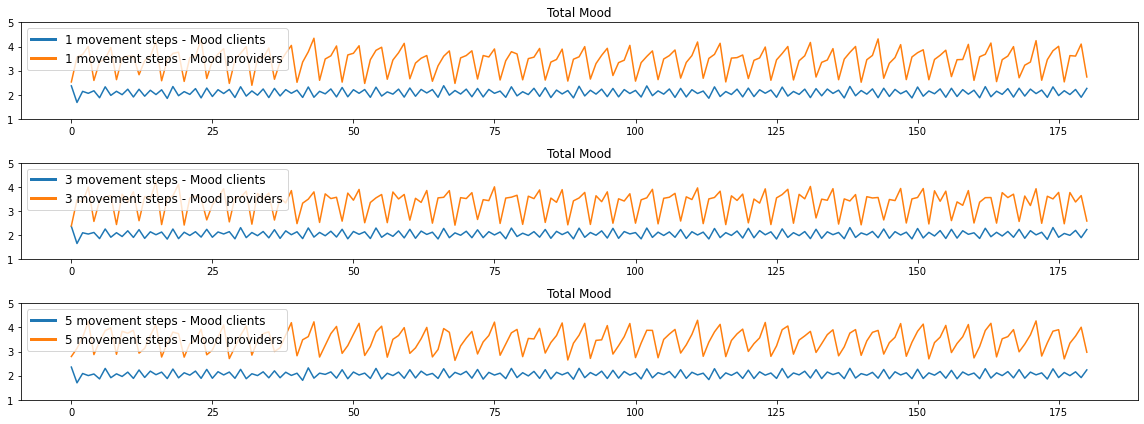

In [189]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [1,3,5]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['movement-steps']==i]['mood_clients'], label='{} movement steps - Mood clients'.format(i))
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['movement-steps']==i]['mood_providers'], label='{} movement steps - Mood providers'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Total Mood")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(1,5)
plt.show()



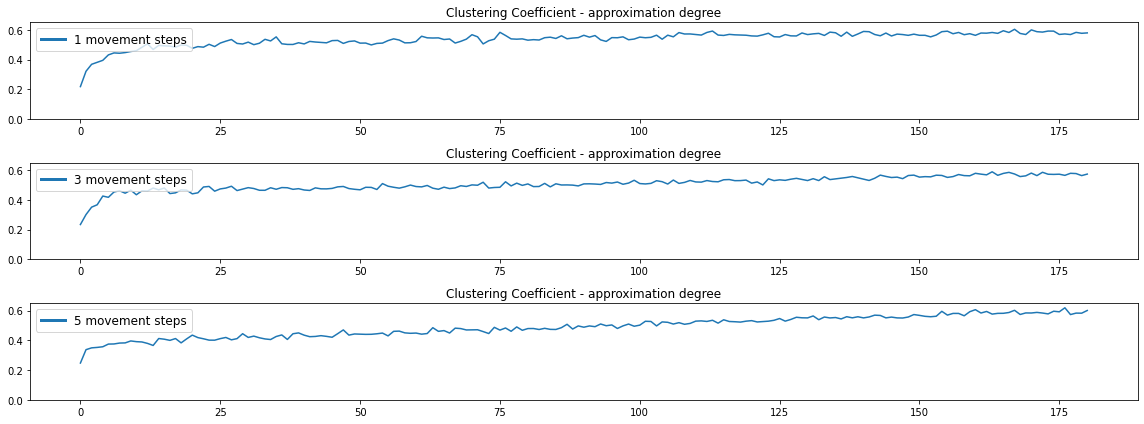

In [190]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [1,3,5]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['movement-steps']==i]['cluster_coef'], label='{} movement steps'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Clustering Coefficient - approximation degree")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(0,0.65)
plt.show()



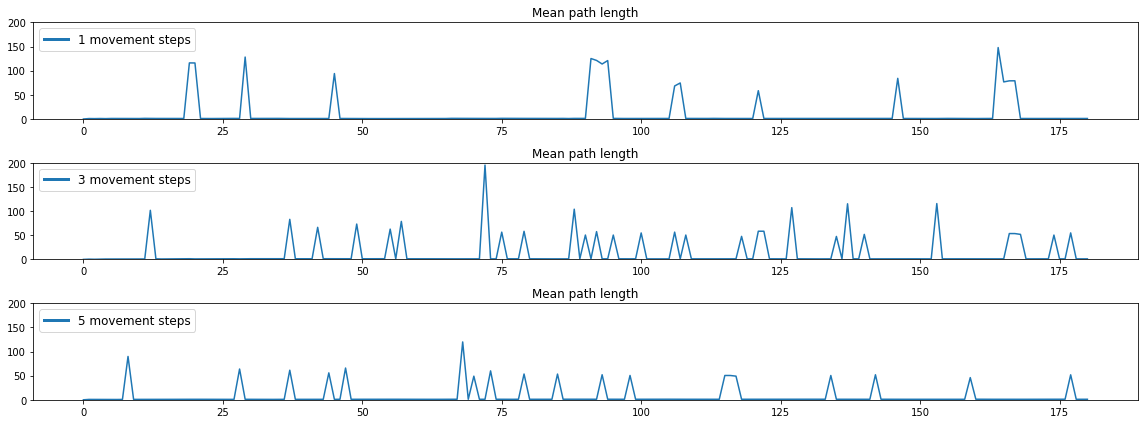

In [191]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [1,3,5]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['movement-steps']==i]['paths'], label='{} movement steps'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Mean path length")
    plt.ylim(0,200)
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(0,200)
plt.show()



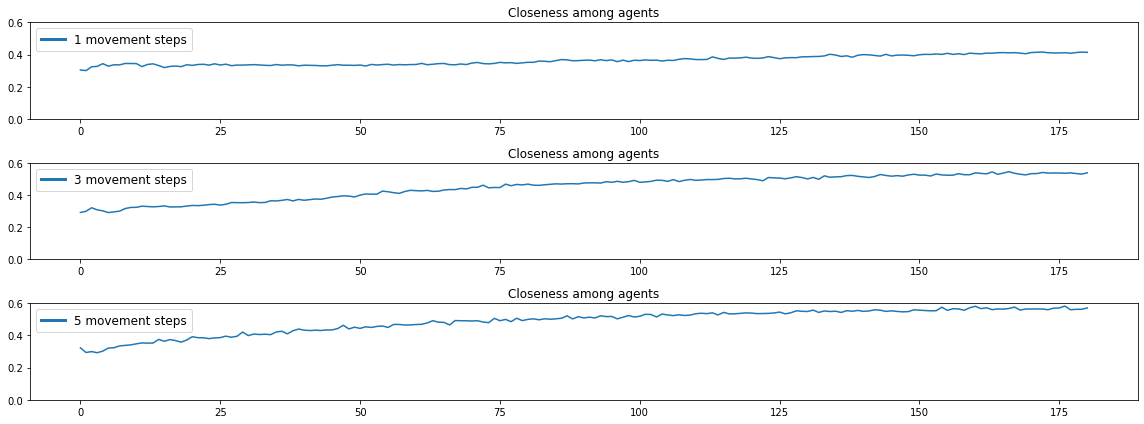

In [192]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [1,3,5]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['movement-steps']==i]['closeness'], label='{} movement steps'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Closeness among agents")
    plt.ylim(0.25,0.6)
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(0,0.6)
plt.show()



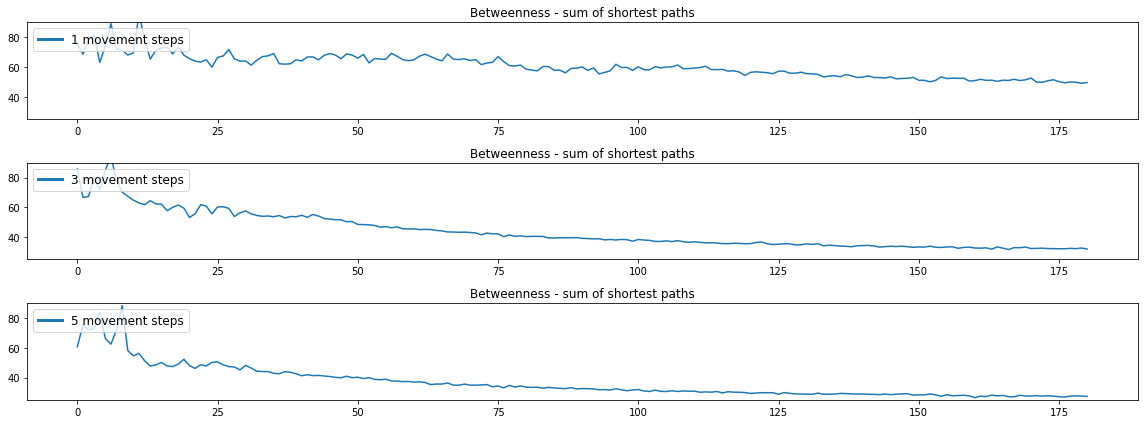

In [194]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [1,3,5]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['movement-steps']==i]['betweenness'], label='{} movement steps'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Betweenness - sum of shortest paths")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(25,90)
plt.show()


In [181]:
mean_start=df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].mean()
mean_final=df_move.reset_index().loc[df_move.reset_index()['movement-steps']==5].mean()

In [182]:
df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1]

,movement-steps,step,mood_clients,mood_providers,cluster_coef,paths,closeness,betweenness,total_mood
0,1,0,2.3728,2.5339,0.2180,0.0000,0.3042,76.0176,4.9066
1,1,1,1.6851,3.5581,0.3211,0.9349,0.3007,68.5871,5.2432
2,1,2,2.1443,3.6762,0.3680,0.7984,0.3244,78.3179,5.8205
3,1,3,2.0639,4.0025,0.3814,0.9969,0.3268,81.4768,6.0664
4,1,4,2.1685,2.5964,0.3948,0.7992,0.3436,63.0766,4.7649
...,...,...,...,...,...,...,...,...,...
176,1,176,2.1706,2.5365,0.5724,1.0249,0.4117,49.2996,4.7070
177,1,177,2.0130,3.6250,0.5683,0.9660,0.4082,49.9715,5.6380
178,1,178,2.2230,3.6048,0.5828,0.9872,0.4126,49.7222,5.8278
179,1,179,1.8992,4.1029,0.5767,1.0990,0.4158,49.0654,6.0022


In [183]:
np.array(mean_final-mean_start)[2:]
pd.set_option('display.precision', 4)



In [184]:
from scipy import stats
t, p =stats.ttest_ind(df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].iloc[:,2:], 
df_move.reset_index().loc[df_move.reset_index()['movement-steps']==5].iloc[:,2:])
df_movement=pd.DataFrame([(mean_final-mean_start).index.values[2:],t,p]).T
df_movement.columns=['indicator','t-test','p-value']
df_movement

,indicator,t-test,p-value
0,mood_clients,2.6036,0.0096
1,mood_providers,-1.1131,0.2664
2,cluster_coef,7.3003,0.0
3,paths,1.0509,0.294
4,closeness,-20.9383,0.0
5,betweenness,23.7234,0.0
6,total_mood,-0.3391,0.7347


In [185]:
t, p =stats.f_oneway(df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].iloc[:,2:], 
df_move.reset_index().loc[df_move.reset_index()['movement-steps']==5].iloc[:,2:])
df_movement=pd.DataFrame([(mean_final-mean_start).index.values[2:],t,p]).T
df_movement.columns=['indicator','F-test','p-value']
df_movement

,indicator,F-test,p-value
0,mood_clients,6.779,0.0096
1,mood_providers,1.2389,0.2664
2,cluster_coef,53.2948,0.0
3,paths,1.1045,0.294
4,closeness,438.4104,0.0
5,betweenness,562.8004,0.0
6,total_mood,0.115,0.7347


In [186]:
df_unhappy=df4.groupby(['percentage-unhappy','step']).agg({'mood_clients':np.mean,'mood_providers':np.mean,
       'cluster_coef':np.mean, 'paths':np.mean, 'closeness':np.mean, 'betweenness':np.mean})
df_unhappy

mood_clients  mood_providers  cluster_coef    paths  \
percentage-unhappy step                                                        
10                 0           2.7924          2.2428        0.2200   0.0000   
                   1           1.9511          1.6319        0.2910   1.1009   
                   2           2.4759          2.0174        0.3448   0.7914   
                   3           2.3909          2.0000        0.3478   1.1699   
                   4           2.5488          1.9280        0.3598   1.1165   
...                               ...             ...           ...      ...   
40                 176         1.7203          3.3229        0.6131   1.0512   
                   177         1.6914          5.5200        0.6002  63.9236   
                   178         1.7777          5.4432        0.6135   1.0017   
                   179         1.5752          6.6900        0.5917   0.9853   
                   180         1.8547          3.5278        0.6045   1.0302   

                         closeness  betweenness  
percentage-unhappy step                          
10                 0        0.3338      71.4109  
                   1        0.3199      66.1182  
                   2        0.3441      82.7635  
                   3        0.3156      99.8190  
                   4        0.3267      65.6205  
...                            ...          ...  
40                 176      0.5218      37.0292  
                   177      0.4975      40.0090  
                   178      0.5117      37.7153  
                   179      0.4987      39.9615  
                   180      0.5094      38.5352  

[724 rows x 6 columns]

ValueError: num must be 1 <= num <= 3, not 4

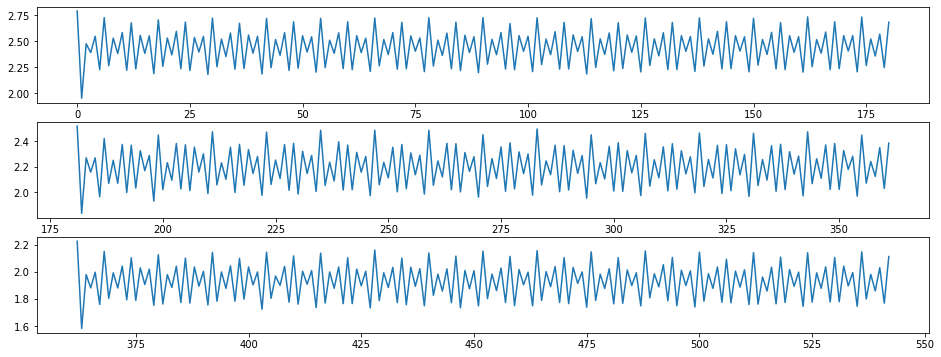

In [187]:
fig, ax = plt.subplots(ncols=1, nrows=4,figsize=(16, 6),gridspec_kw={'height_ratios': [1.2,1.2,1.2,1.2]})
x=0
for i in [10,20,30,40]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(df_unhappy.reset_index().loc[df_unhappy.reset_index()['percentage-unhappy']==i]['mood_clients'] )
plt.show()

In [ ]:
df4.groupby(['frac-providers','step']).agg({'mood_clients':np.mean,'mood_providers':np.mean,
       'cluster_coef':np.mean, 'paths':np.mean, 'closeness':np.mean, 'betweenness':np.mean})

mood_clients  mood_providers  cluster_coef       paths  \
frac-providers step                                                           
0.15           0         2.426471        2.303922      0.174152    0.000000   
               1         1.584034        2.722222      0.257038    0.000000   
               2         2.072712        2.953704      0.288838    0.000000   
               3         1.938581        3.789216      0.293876    0.000000   
               4         2.144385        2.412879      0.351568    0.308789   
               5         1.863777        3.192982      0.358970    0.351965   
               6         2.324755        3.173611      0.409421  122.145200   
               7         1.852482        3.539062      0.408284  104.189695   
               8         2.094457        2.461538      0.432471    0.453189   
               9         1.946267        3.102564      0.458475  103.341565   
               10        2.184955        3.083333      0.417689    0.424087   
               11        1.825368        3.513889      0.407093    0.351872   
               12        2.290850        2.558642      0.441073    0.504993   
               13        1.824142        3.180556      0.443465    0.555446   
               14        2.177696        3.138889      0.432125    0.309744   
               15        1.984804        3.691667      0.442217    0.532468   
               16        2.081643        2.488506      0.456567    0.756635   
               17        1.788603        3.000000      0.453944    0.676988   
               18        2.239496        3.279762      0.440070    0.677758   
               19        1.850184        3.458333      0.464823    0.659741   
               20        2.094669        2.424479      0.469041    0.654895   
               21        1.960953        3.060345      0.487457   89.333501   
               22        2.151471        3.180556      0.468288    0.681150   
               23        1.788725        3.627778      0.451080    0.567131   
               24        2.241176        2.600000      0.455201    0.739979   
               25        1.819118        2.986111      0.483923    0.727785   
               26        2.099724        3.158854      0.480152    0.678184   
               27        1.984820        3.580645      0.491370    0.692201   
               28        2.104517        2.446429      0.477772    0.673203   
               29        1.840196        2.891667      0.466698    0.845380   
               30        2.224265        3.303571      0.452736    0.709008   
               31        1.825980        3.611111      0.456323    0.577131   
               32        2.053046        2.425595      0.496373    0.877475   
               33        1.952206        3.116071      0.519022    0.794790   
               34        2.060399        3.270833      0.503650    0.866071   
               35        1.800551        3.549479      0.475367   92.065229   
               36        2.255447        2.518519      0.462713    0.787975   

                     closeness  betweenness  
frac-providers step                          
0.15           0      0.342745    10.313235  
               1      0.343492    17.126786  
               2      0.364200    25.049306  
               3      0.360399    23.408824  
               4      0.352970    35.263636  
               5      0.351193    33.610526  
               6      0.358454    44.577083  
               7      0.345690    46.016016  
               8      0.345343    49.394712  
               9      0.364838    48.212019  
               10     0.364882    41.266827  
               11     0.358237    40.975000  
               12     0.359174    45.647685  
               13     0.370732    41.050521  
               14     0.366232    41.319271  
               15     0.373850    40.329583  
               16     0.357173    45.945690  
               17     0.362747    43.136719  
               18  